In [10]:
train = 'train'
test = 'test'

eng = 'english'
arm = 'armania'

languages = [arm, eng]
categories = [train, test]

dataset_root_path = 'E:/data/'
train_path = dataset_root_path + train

batch_size = 1
image_width = 500
image_height = 128

validation_split = 0.1
initial_learning_rate = 0.045

num_classes = len(languages)

model_file = dataset_root_path + 'model.h5'
num_classes

2

In [2]:
from glob import glob
import math
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np
import warnings
import librosa as lr
import matplotlib.pyplot as plt
from librosa.display import waveplot
import imageio
from IPython.display import Audio
import os

In [3]:
all_files = glob(train_path + '/*/*.png')

num_validation = len(all_files) * validation_split
num_train = len(all_files) - num_validation

validation_steps = int(num_validation/ batch_size)
steps_per_epoch = int(num_train/ batch_size)

print('Steps per Epoch: ' + str(steps_per_epoch))
print('Validation steps: ' + str(validation_steps))

Steps per Epoch: 288
Validation steps: 32


In [4]:
image_data_generator = ImageDataGenerator(rescale=1./255, validation_split=validation_split)
train_generator = image_data_generator.flow_from_directory(train_path, batch_size=batch_size, class_mode='categorical', target_size=(image_height, image_width), color_mode='grayscale', subset='training')
validation_generator = image_data_generator.flow_from_directory(train_path, batch_size=batch_size, class_mode='categorical', target_size=(image_height, image_width), color_mode='grayscale', subset='validation')


Found 288 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [5]:
img_input = Input(shape=(image_height, image_width, 1))

img_conc = Concatenate(axis=3, name='input_concat')([img_input, img_input, img_input])

model = InceptionV3(input_tensor=img_conc, weights=None, include_top=True, classes=2)

model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 500, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_concat (Concatenate)     (None, 128, 500, 3)  0           ['input_1[0][0]',                
                                                                  'input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 249, 32)  864         ['input_concat[0][0]']

In [6]:
model.compile(optimizer=RMSprop(learning_rate=initial_learning_rate, clipvalue=2.0), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)

In [8]:
def step_decay(epoch, learning_rate):
    drop = 0.5
    epochs_drop = 2.0
    lrate = learning_rate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

learning_rate_decay = LearningRateScheduler(step_decay, verbose=1)

In [9]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=25, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, callbacks=[early_stopping, learning_rate_decay])


Epoch 00001: LearningRateScheduler setting learning rate to 0.04500000178813934.
Epoch 1/25
288/288 [==============================] - 119s 381ms/step - loss: 2.8482 - accuracy: 0.4861 - val_loss: 247.5130 - val_accuracy: 0.5000 - lr: 0.0450

Epoch 00002: LearningRateScheduler setting learning rate to 0.02250000089406967.
Epoch 2/25
288/288 [==============================] - 108s 373ms/step - loss: 0.7603 - accuracy: 0.5000 - val_loss: 0.9160 - val_accuracy: 0.5000 - lr: 0.0225

Epoch 00003: LearningRateScheduler setting learning rate to 0.011250000447034836.
Epoch 3/25
288/288 [==============================] - 123s 428ms/step - loss: 0.6962 - accuracy: 0.5833 - val_loss: 0.7736 - val_accuracy: 0.6875 - lr: 0.0113

Epoch 00004: LearningRateScheduler setting learning rate to 0.002812500111758709.
Epoch 4/25
288/288 [==============================] - 118s 410ms/step - loss: 0.5046 - accuracy: 0.7535 - val_loss: 1.0936 - val_accuracy: 0.3438 - lr: 0.0028

Epoch 00005: LearningRateSchedu

In [11]:
model.save(model_file)

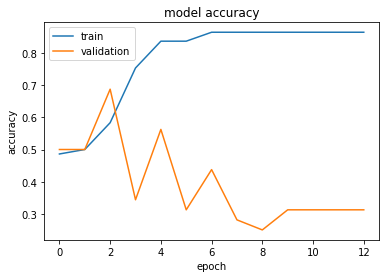

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [48]:
test_path = dataset_root_path + test

In [49]:
all_files = glob(test_path + '/*/*.png')

num_test = len(all_files)

evaluation_steps = int(num_test / batch_size)

print('Evaluation steps: ' + str(evaluation_steps))

Evaluation steps: 40


In [50]:
image_data_generator = ImageDataGenerator(rescale=1./255)

evaluation_generator = image_data_generator.flow_from_directory(test_path, batch_size=batch_size, class_mode='categorical', target_size=(image_height, image_width), color_mode='grayscale')


Found 40 images belonging to 2 classes.


In [53]:
from tensorflow.keras.models import load_model

In [54]:
model = load_model(model_file)

In [55]:
_, test_accuracy = model.evaluate(evaluation_generator, steps=evaluation_steps)

40/40 [==============================] - 4s 70ms/step - loss: 0.6626 - accuracy: 0.6250


In [56]:
print('Test accuracy: ' + str(round(test_accuracy * 100., 1)) + ' %')


Test accuracy: 62.5 %


In [41]:
model.predict(evaluation_generator)

array([[0.43621016, 0.56378984]], dtype=float32)

['E:/data/pred\\New recording 3.wav']

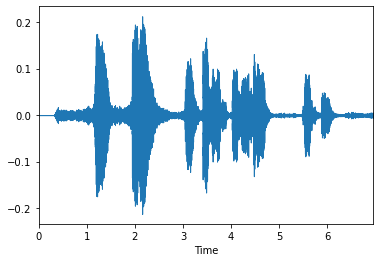

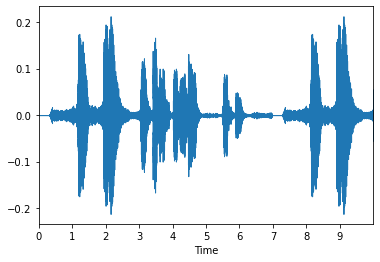

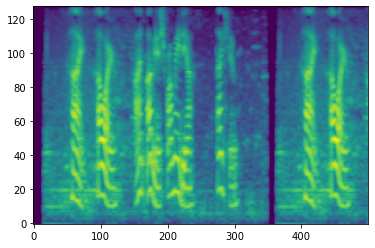

(128, 500)